In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
path = "./Sales_Data"
files = [file for file in os.listdir(path) if not file.startswith('.')] # Ignore hidden files

all_months_data = pd.DataFrame()

for file in files:
    current_data = pd.read_csv(path+"/"+file)
    all_months_data = pd.concat([all_months_data, current_data])
    
all_months_data.to_csv("all_data.csv", index=False)

In [68]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,{
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",NaN
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",NaN
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",NaN


In [ ]:
#We Need to Drop that NaN coloum so we can then filter through the rows that have NaN and keep the rest of the useful Data

In [34]:
# Drop the '{' column
all_data = all_data.drop(columns=['{'])

# Remove rows containing NaN values in other columns
all_data = all_data.dropna()

# Display the DataFrame after removing the column and rows with NaN values
print(all_data.head())


  Order ID                     Product Quantity Ordered Price Each  \
0   176558        USB-C Charging Cable                2      11.95   
2   176559  Bose SoundSport Headphones                1      99.99   
3   176560                Google Phone                1        600   
4   176560            Wired Headphones                1      11.99   
5   176561            Wired Headphones                1      11.99   

       Order Date                      Purchase Address  
0  04/19/19 08:46          917 1st St, Dallas, TX 75001  
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215  
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  
5  04/30/19 09:27     333 8th St, Los Angeles, CA 90001  


In [ ]:
#We need to clean up the data and get rid of any funky dates and times
#Also adding a Month colum

In [35]:
all_data = all_data[all_data['Order Date'].str[0:2]!='Or']

In [36]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

In [37]:
# Remove rows with invalid date values
all_data = all_data[all_data['Order Date'].str[:2] != 'Or']

# Extract month from 'Order Date' column
all_data['Month'] = all_data['Order Date'].str[0:2]

# Convert 'Month' column to numeric
all_data['Month'] = pd.to_numeric(all_data['Month'], errors='coerce')

# Drop rows with NaN values in 'Month' column
all_data = all_data.dropna(subset=['Month'])

# Convert 'Month' column to integer
all_data['Month'] = all_data['Month'].astype('int32')


In [38]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [39]:
# Define functions to extract city and state
def get_city(address):
    if isinstance(address, str):  # Check if address is a string
        return address.split(",")[1].strip()  # Split and extract city
    else:
        return np.nan  # Return NaN for non-string values

def get_state(address):
    if isinstance(address, str):  # Check if address is a string
        return address.split(",")[2].split(" ")[1]  # Split and extract state
    else:
        return np.nan  # Return NaN for non-string values

# Apply functions to create 'City' and 'State' columns
all_data['City'] = all_data['Purchase Address'].apply(get_city)
all_data['State'] = all_data['Purchase Address'].apply(get_state)

In [ ]:
#Which states have the most Orders?

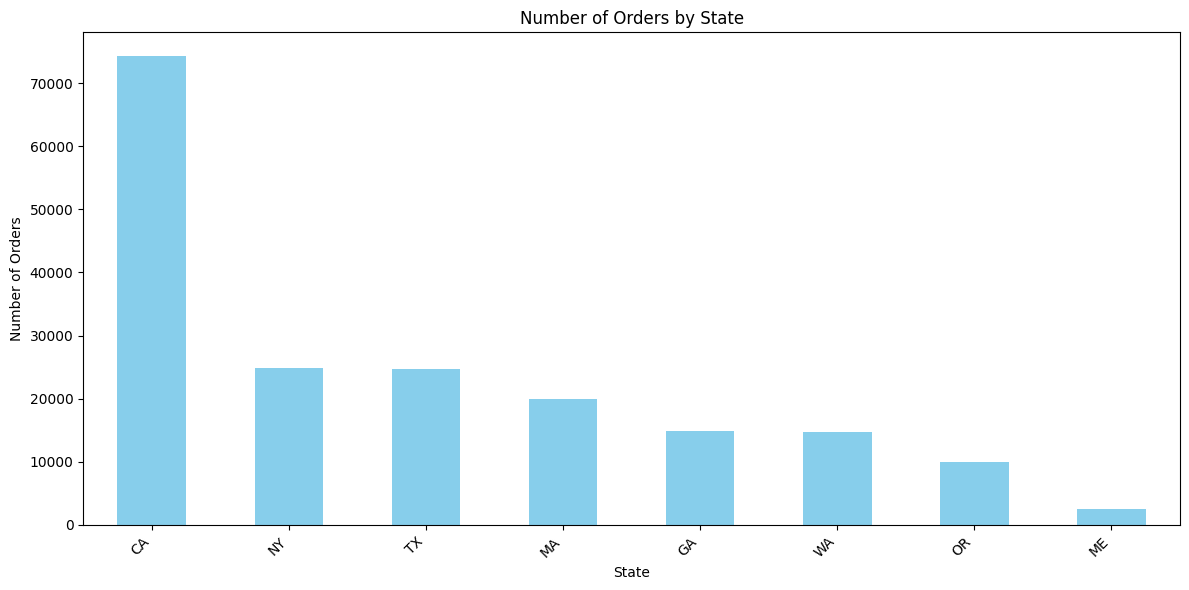

In [40]:
def get_state(address):
    return address.split(",")[-1].split(" ")[1]

# Add a new column 'State' to the DataFrame
all_data['State'] = all_data['Purchase Address'].apply(get_state)

# Count the number of orders from each state
state_order_counts = all_data['State'].value_counts()

# Plot the bar graph
plt.figure(figsize=(12, 6))
state_order_counts.plot(kind='bar', color='skyblue')
plt.xlabel('State')
plt.ylabel('Number of Orders')
plt.title('Number of Orders by State')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
#Which states buy the most expensive items? which states buy the least expensive items?

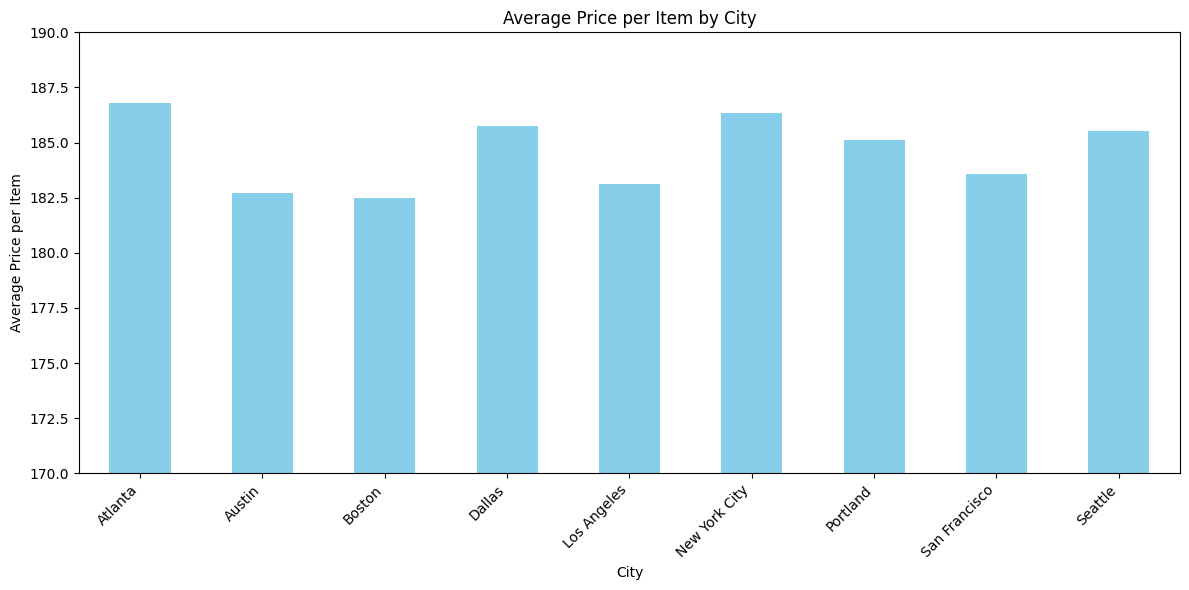

In [41]:
# Extract the city and price information
all_data['City'] = all_data['Purchase Address'].apply(lambda x: x.split(",")[1].strip())
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'], errors='coerce')

# Calculate the total price for each city
city_total_price = all_data.groupby('City')['Price Each'].sum()

# Calculate the total number of items sold in each city
city_item_counts = all_data['City'].value_counts()

# Calculate the average price per item in each city
city_avg_price_per_item = city_total_price / city_item_counts

# Plot the bar graph with adjusted y-axis limits
plt.figure(figsize=(12, 6))
city_avg_price_per_item.plot(kind='bar', color='skyblue')
plt.xlabel('City')
plt.ylabel('Average Price per Item')
plt.title('Average Price per Item by City')
plt.xticks(rotation=45, ha='right')
plt.ylim(170, 190)  # Adjust the y-axis limits
plt.tight_layout()
plt.show()

In [ ]:
#Most bought items and revenue for the highest and lowest state?

In [54]:
# Filter data for purchases made in Atlanta
atlanta_data = all_data[all_data['City'] == 'Atlanta'].copy()  # Make a copy to avoid chained indexing warning

# Create the 'Revenue' column by multiplying 'Quantity Ordered' and 'Price Each'
atlanta_data['Revenue'] = atlanta_data['Quantity Ordered'] * atlanta_data['Price Each']

# Calculate the total quantity sold and revenue for each product in Atlanta
product_quantity_sold_atlanta = atlanta_data.groupby('Product')['Quantity Ordered'].sum()
product_revenue_atlanta = atlanta_data.groupby('Product')['Revenue'].sum()

# Combine quantity sold and revenue into a single DataFrame
atlanta_summary = pd.DataFrame({
    'Quantity Sold': product_quantity_sold_atlanta,
    'Revenue': product_revenue_atlanta
})

# Sort products based on total quantity sold in descending order
top_5_most_bought_items_atlanta = atlanta_summary.nlargest(5, 'Quantity Sold')

# Print the top 5 most bought items in Atlanta
print("Top 5 Most Bought Items in Atlanta:")
print(top_5_most_bought_items_atlanta)

# Filter data for purchases made in Boston
boston_data = all_data[all_data['City'] == 'Boston'].copy()  # Make a copy to avoid chained indexing warning

# Create the 'Revenue' column by multiplying 'Quantity Ordered' and 'Price Each'
boston_data['Revenue'] = boston_data['Quantity Ordered'] * boston_data['Price Each']

# Calculate the total quantity sold and revenue for each product in Boston
product_quantity_sold_boston = boston_data.groupby('Product')['Quantity Ordered'].sum()
product_revenue_boston = boston_data.groupby('Product')['Revenue'].sum()

# Combine quantity sold and revenue into a single DataFrame
boston_summary = pd.DataFrame({
    'Quantity Sold': product_quantity_sold_boston,
    'Revenue': product_revenue_boston
})

# Sort products based on total quantity sold in descending order
top_5_most_bought_items_boston = boston_summary.nlargest(5, 'Quantity Sold')

# Print the top 5 most bought items in Boston
print("Top 5 Most Bought Items in Boston:")
print(top_5_most_bought_items_boston)



Top 5 Most Bought Items in Atlanta:
                          Quantity Sold   Revenue
Product                                          
AAA Batteries (4-pack)             2359   7053.41
AA Batteries (4-pack)              2193   8421.12
USB-C Charging Cable               1915  22884.25
Lightning Charging Cable           1879  28091.05
Wired Headphones                   1579  18932.21
Top 5 Most Bought Items in Boston:
                          Quantity Sold   Revenue
Product                                          
AAA Batteries (4-pack)             3461  10348.39
AA Batteries (4-pack)              3016  11581.44
USB-C Charging Cable               2561  30603.95
Lightning Charging Cable           2491  37240.45
Wired Headphones                   2222  26641.78


In [ ]:
#Best time to buy?

  Order ID                     Product  Quantity Ordered  Price Each  \
0   176558        USB-C Charging Cable                 2       11.95   
2   176559  Bose SoundSport Headphones                 1       99.99   
3   176560                Google Phone                 1      600.00   
4   176560            Wired Headphones                 1       11.99   
5   176561            Wired Headphones                 1       11.99   

           Order Date                      Purchase Address  Month  \
0 2019-04-19 08:46:00          917 1st St, Dallas, TX 75001      4   
2 2019-04-07 22:30:00     682 Chestnut St, Boston, MA 02215      4   
3 2019-04-12 14:38:00  669 Spruce St, Los Angeles, CA 90001      4   
4 2019-04-12 14:38:00  669 Spruce St, Los Angeles, CA 90001      4   
5 2019-04-30 09:27:00     333 8th St, Los Angeles, CA 90001      4   

          City State  Order Hour  Hour  Minute  Count  
0       Dallas    TX           8     8      46      1  
2       Boston    MA          22  

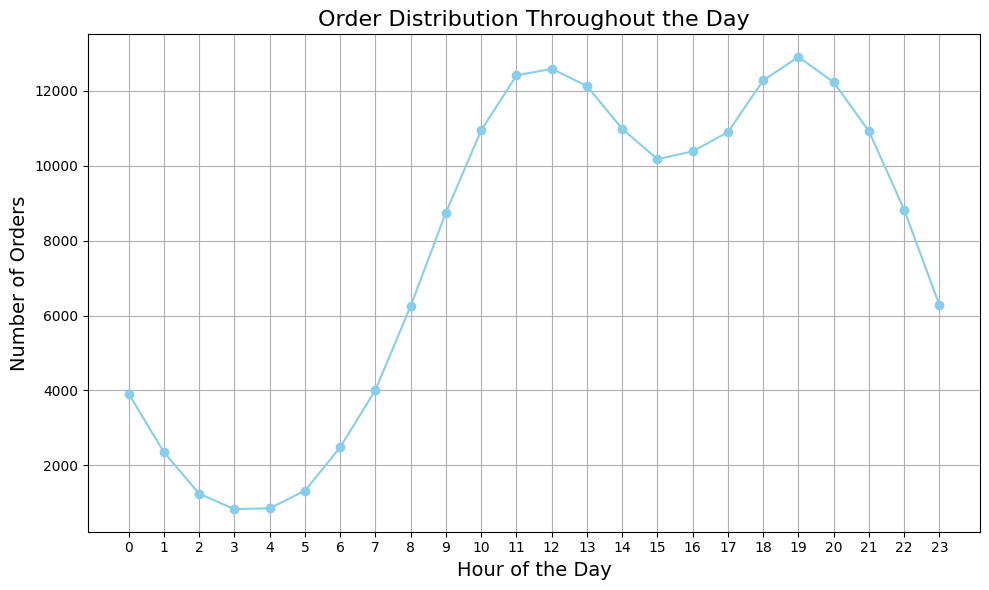

In [59]:
# Assuming you have already loaded the data and named it 'all_data'

# Extract hour and minute from the 'Order Date' column
all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour
all_data['Minute'] = pd.to_datetime(all_data['Order Date']).dt.minute

# Add a count column to represent each order
all_data['Count'] = 1

# Display the first few rows to verify changes
print(all_data.head())

# Group the data by hour and count the number of orders in each hour
hourly_order_count = all_data.groupby('Hour')['Count'].count()

# Plot the data
plt.figure(figsize=(10, 6))
hourly_order_count.plot(marker='o', color='skyblue')
plt.title('Order Distribution Throughout the Day', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Number of Orders', fontsize=14)
plt.xticks(range(24))  # Set ticks for each hour of the day
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#Items frequently bought together?

In [64]:
# Filter data to include only rows where Order ID is duplicated, indicating products sold together
df = all_data[all_data['Order ID'].duplicated(keep=False)].copy()

# Combine products for each order into a single string
df.loc[:, 'Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

# Drop duplicate order IDs to avoid counting pairs within the same order
df = df[['Order ID', 'Grouped']].drop_duplicates()

# Initialize a Counter object to count pairs of products
from itertools import combinations
from collections import Counter

count = Counter()

# Iterate over each grouped order and count pairs of products
for row in df['Grouped']:
    row_list = row.split(',')  # Split the string into a list of products
    count.update(Counter(combinations(row_list, 2)))  # Count pairs of products

# Print the 10 most common pairs of products
for key, value in count.most_common(10):
    print(key, value)


('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


In [ ]:
#Quantity ordered by each item

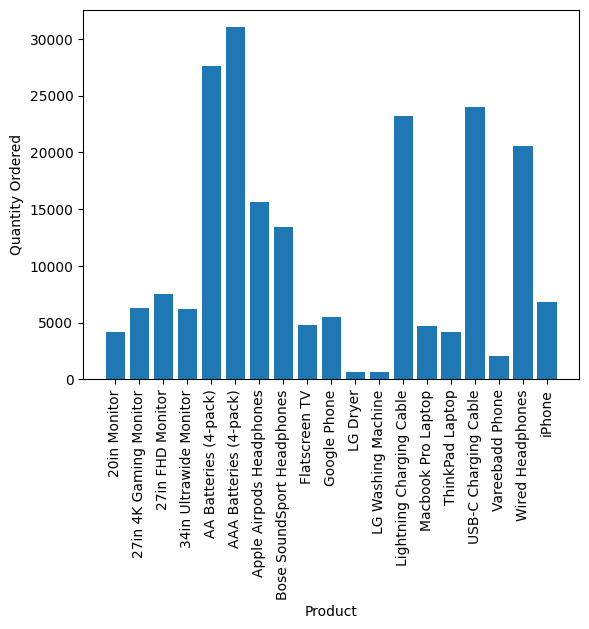

In [66]:
# Group the data by product and sum the quantity ordered for each product
product_group = all_data.groupby('Product')
quantity_ordered = product_group['Quantity Ordered'].sum()

# Get the product names
products = quantity_ordered.index

# Plot the bar chart
plt.bar(products, quantity_ordered)
plt.xticks(rotation='vertical')
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.show()


In [ ]:
#Quantity Ordered vs Price per Item

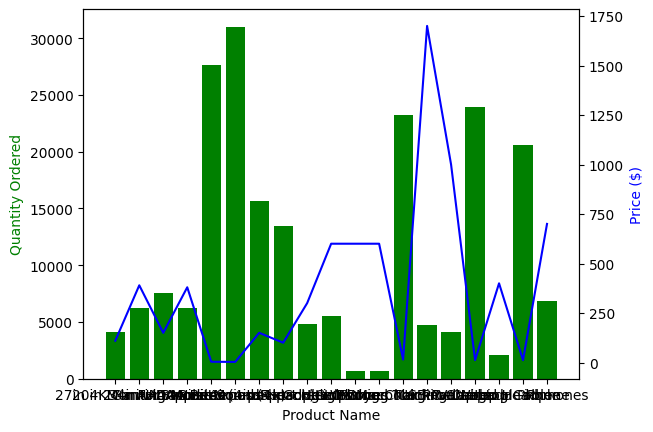

In [67]:
# Group the data by product and sum the quantity ordered for each product
product_group = all_data.groupby('Product')
quantity_ordered = product_group['Quantity Ordered'].sum()

# Get the average price for each product
prices = product_group['Price Each'].mean()

# Get the product names
products = quantity_ordered.index

# Plotting
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='g')
ax2.plot(products, prices, color='b')

# Set labels and rotation
ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
plt.xticks(rotation='vertical')

plt.show()
